# SPEECH EMOTION RECOGNITION SYSTEM

**PROJECT OVERVIEW**

Through all the available senses humans can actually sense the emotional state of their communication partner. The emotional detection is natural for humans but it is very difficult task for computers; although they can easily understand content based information, accessing the depth behind content is difficult and that’s what speech emotion recognition (SER) sets out to do. It is a system through which various audio speech files are classified into different emotions such as happy, sad, anger and neutral by computer. SER can be used in areas such as the medical field or customer call centers.

**DATASET**

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) Dataset from Kaggle contains 1440 audio files from 24 Actors vocalizing two lexically-matched statements. Emotions include angry, happy, sad, fearful, calm, neutral, disgust, and surprised.[Dataset](https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio)

### STEP 1 - IMPORT DEPENDENCIES LIBRARIES

In [1]:
#Install all the Reqiuired Libraries and Packages 
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import pickle
import librosa
from scipy import signal
import noisereduce as nr
import librosa.display
import soundfile as sf
from IPython.display import Audio
get_ipython().magic('matplotlib inline')
import soundfile
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore")

/var/folders/wv/pgq32q357hj6kr691lj2_lx80000gn/T/ipykernel_3182/3060623336.py:17: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


### STEP 2 - LOAD THE RAVDESS DATASET

In [2]:
#Loading the required RAVDESS DataSet with length of 1439 Audio Files 
os.listdir(path='./speech-emotion-recognition-ravdess-data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = './speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

2881

**Male Neutral**

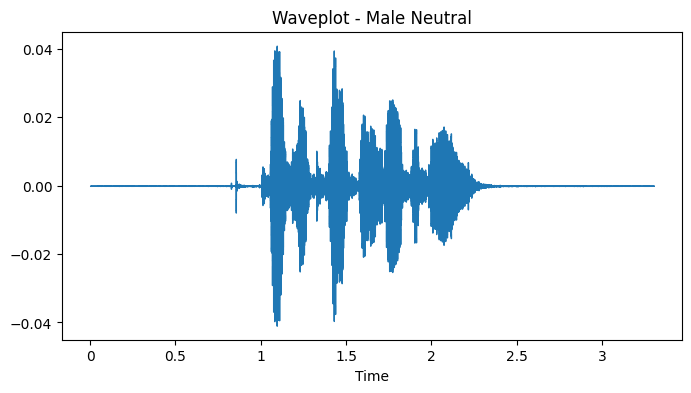

In [3]:
#Male Neutral

# LOAD IN FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

# PLAY AUDIO FILE

sf.write('./speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav', x,sr)
Audio(data=x, rate=sr)

**Female Calm**

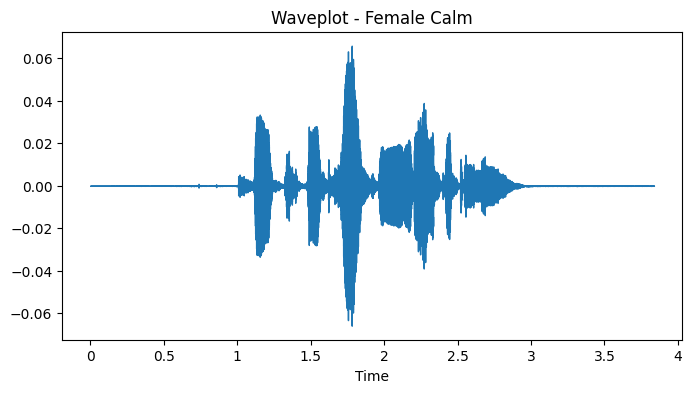

In [4]:
#Female Calm

# LOAD IN FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_02/03-01-02-01-01-01-02.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

# PLAY AUDIO FILE
sf.write('./speech-emotion-recognition-ravdess-data/Actor_02/03-01-02-01-01-01-02.wav', x,sr)
Audio(data=x, rate=sr)

**Male Happy**

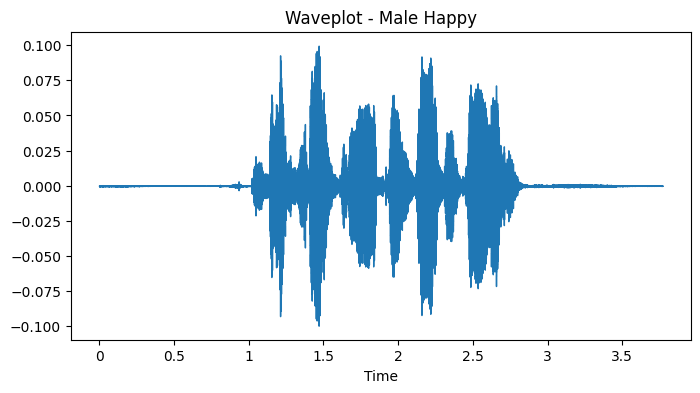

In [5]:
#Male Happy

# LOAD IN FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_03/03-01-03-01-01-01-03.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

# PLAY AUDIO FILE

sf.write('./speech-emotion-recognition-ravdess-data/Actor_03/03-01-03-01-01-01-03.wav', x,sr)
Audio(data=x, rate=sr)

**Female Sad**

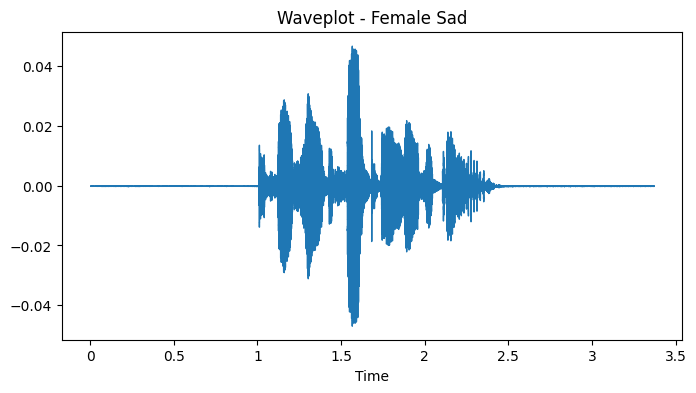

In [6]:
#Female Sad

# LOAD FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_04/03-01-04-01-01-01-04.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

# PLAY AUDIO FILE
sf.write('./speech-emotion-recognition-ravdess-data/Actor_04/03-01-04-01-01-01-04.wav', x, sr)
Audio(data=x, rate=sr)

**Male Angry**

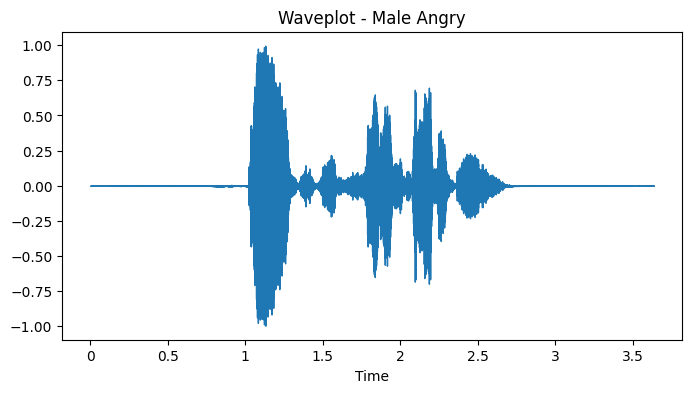

In [7]:
#Male Angry

# LOAD FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_05/03-01-05-02-02-01-05.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

# PLAY AUDIO FILE
sf.write('./speech-emotion-recognition-ravdess-data/Actor_05/03-01-05-01-01-01-02.wav', x, sr)
Audio(data=x, rate=sr)

**Female Fearful**

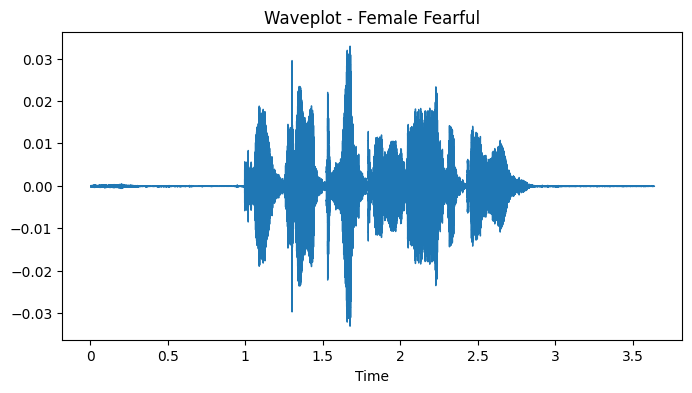

In [8]:
#Female Fearful

# LOAD FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_06/03-01-06-01-01-01-06.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')

# PLAY AUDIO FILE
sf.write('./speech-emotion-recognition-ravdess-data/Actor_06/03-01-06-01-01-01-06.wav', x, sr)
Audio(data=x, rate=sr)

**Male Disgust**

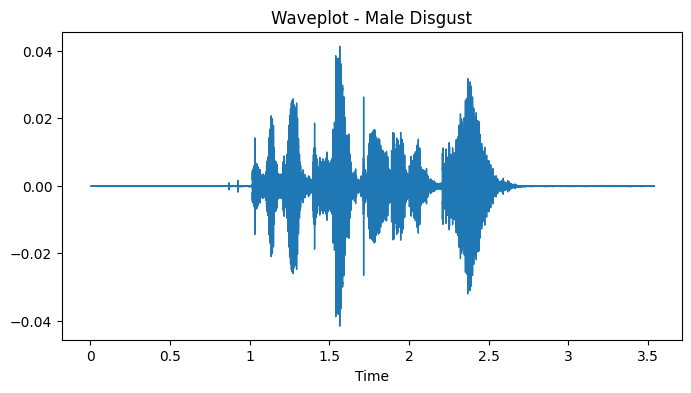

In [9]:
#Male Disgust

# LOAD FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_07/03-01-07-01-01-01-07.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')

# PLAY AUDIO FILE
sf.write('./speech-emotion-recognition-ravdess-data/Actor_07/03-01-07-01-01-01-07.wav', x, sr)
Audio(data=x, rate=sr)

**Female Surprised**

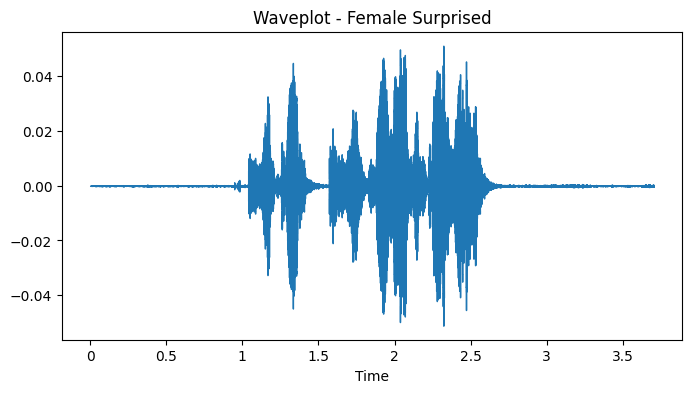

In [10]:
#Female Surprised

# LOAD FILE
x, sr = librosa.load('./speech-emotion-recognition-ravdess-data/Actor_08/03-01-08-01-01-01-08.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Female Surprised')
plt.savefig('Waveplot_FemaleSurprised.png')

# PLAY AUDIO FILE
sf.write('./speech-emotion-recognition-ravdess-data/Actor_08/03-01-08-01-01-01-08.wav', x, sr)
Audio(data=x, rate=sr)

### STEP 3 - USING SPEECH RECOGNITION API TO CONVERT AUDIO TO TEXT

In [ ]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to 
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

sitting by the door
sitting by the door
13 B tour
talking by the door
error
talking by the door
thoughts are sitting by the tower
dogs are sitting by the door
stop that
talking by the door
dogs are sitting by the
talking by the door
kids talking by the
jobs at setting by the tower
target setting by the tower
talking by the dohe
sitting by the door
jobs at sitting by the tower
kids talking by the door
kids talking by the door
error
talking by the door
Australia by road
64
jobs at setting by the door
dog sitting by the demo
685
error
by the door
error
sitting by the door
setting Bible Java
talking by the door
the talking by the door
sitting
sitting by the door
dogs sitting batua
the talking by the tour
error
talking by the door
thought in Bible
sitting by the river
dogs are sitting by the door
but the door
not just sitting by the door
Thor 3
kids at 14 by the door
sitting by the
sitting by the door
error
don't standing by the door
by the door
talking by the door
sitting by the door
talki

kids talking by the door
dogs setting baddua
dogs are sitting by the door
jobs sitting bad draw
sitting by the door
error
talking by the door
talking by the door
talking Babita
dogs sitting by the door
sitting by the door
not string by the door
f****** by the door
kids talking by the tower
talking by the door
not setting Baj daw
note 9
dog sitting by the door
error
thought important
the talking by the door
kids talking by the door
sitting by the door
talking by the door
sitting by the door
dog sitting by the door
kids talking by the door
kids talking by the door
tour
talking by the door
hit hacking baddua
weather
dog sitting B over
chocolate syrup at the door
chocolate sitting by the tower
error
open the door
shit talking by the door
talking by the door
error
stop staring at the door
error
the talking by the door
to talk about the door
error
error
error
stock that sitting by the door
sitting at the door
talking by the door
error
ki baddua
sitting by the door
the talking by the door
Eta

### STEP 4 - PLOTTING TO UNDERSTAND RAW AUDIO FILES

In [3]:
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [ ]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = librosa.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    
#PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()

### STEP 5 - VISUALIZATION OF AUDIO DATA

In [4]:
#Next Step is In-Depth Visualisation of Audio Fiels and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

In [ ]:
# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
for file in range(0 , len(listOfFiles) , 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 1):
#     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

### STEP 6 - CLEANING & MASKING

In [53]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [54]:
#The clean Audio Files are redirected to Clean Audio Folder Directory 
import glob,pickle
for file in tqdm(glob.glob(r'./speech-emotion-recognition-ravdess-data/**/*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'./clean_speech/'+str(file_name), rate=rate,data=signal[mask])

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1441/1441 [01:26<00:00, 16.63it/s]


### STEP 7 - FEATURE EXTRACTION

Define a function extract_feature to extract the mfcc, chroma, and mel features from a sound file. This function takes 4 parameters- the file name and three Boolean parameters for the three features:

**mfcc:** Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound

**chroma:** Pertains to the 12 different pitch classes

**mel: Mel Spectrogram Frequency**

In [83]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

### STEP 8 - LABELS CLASSIFICATION

Now, let’s define a dictionary to hold numbers and the emotions available in the RAVDESS dataset, and a list to hold those we want- calm, happy, fearful, disgust.

In [84]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

### STEP 9 - LOADING OF DATA & SPLITTING OF DATASET

Now, let’s load the clean data with a function load_data() – this takes in the relative size of the test set as parameter. x and y are empty lists; we’ll use the glob() function from the glob module to get all the pathnames for the sound files in our dataset,

In [85]:
#Load the clean data
from glob import glob
import os
import glob
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'./clean_speech/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

Time to split the dataset into training and testing sets! Let’s keep the test set 25% of everything and use the load_data function for this.

In [86]:
#Split the dataset
import librosa
import numpy as np
x_train,x_test,y_trai,y_tes=load_data(test_size=0.15)
print(np.shape(x_train),np.shape(x_test), np.shape(y_trai),np.shape(y_tes))
y_test_map = np.array(y_tes).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_trai).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

(652, 180) (116, 180) (652, 2) (116, 2)
(652,) (116,)
03-01-03-02-02-01-16.wav
03-01-03-01-02-01-17.wav
03-01-03-01-02-02-05.wav
03-01-06-01-01-02-19.wav
03-01-02-02-01-01-19.wav
03-01-02-01-02-02-01.wav
03-01-07-01-02-01-17.wav
03-01-03-02-02-02-04.wav
03-01-03-02-02-01-14.wav
03-01-07-01-01-02-17.wav
03-01-07-02-02-01-12.wav
03-01-06-01-02-01-13.wav
03-01-07-02-01-02-09.wav
03-01-02-02-01-02-01.wav
03-01-06-02-01-01-12.wav
03-01-02-02-01-02-19.wav
03-01-06-01-02-02-03.wav
03-01-03-01-02-02-13.wav
03-01-06-01-01-01-14.wav
03-01-06-02-01-02-14.wav
03-01-03-01-02-02-21.wav
03-01-06-02-02-02-23.wav
03-01-06-02-02-01-07.wav
03-01-07-02-01-01-21.wav
03-01-03-01-02-02-23.wav
03-01-06-02-02-02-24.wav
03-01-06-02-02-01-06.wav
03-01-03-01-02-01-13.wav
03-01-07-02-01-02-24.wav
03-01-02-02-01-02-23.wav
03-01-03-01-02-01-09.wav
03-01-03-01-02-02-14.wav
03-01-06-01-01-02-04.wav
03-01-03-02-01-01-02.wav
03-01-03-01-01-01-15.wav
03-01-02-02-02-01-02.wav
03-01-03-02-02-01-05.wav
03-01-07-01-02-01-11.

In [87]:
#Get the shape of the training and testing datasets
# print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(array([-3.01912079e+02,  9.34302063e+01, -4.76983681e+01,  3.92740784e+01,
       -1.28509626e+01, -1.55495911e+01, -1.12744112e+01, -1.99379253e+01,
       -1.21767168e+01,  3.92465568e+00, -8.17400455e+00, -2.97451854e+00,
       -9.59050274e+00, -2.34250689e+00, -9.54744816e+00, -4.77145052e+00,
       -1.27329884e+01,  4.39229441e+00, -1.48173532e+01,  2.40496635e+00,
       -7.33923483e+00, -1.83260119e+00, -1.10677977e+01,  1.46190441e+00,
       -8.39977741e+00,  7.47938305e-02, -5.64724684e+00,  3.14806366e+00,
       -8.27742577e+00,  3.05029464e+00, -7.13194323e+00, -7.23919570e-01,
       -6.76089346e-01,  1.51567507e+00, -5.27797222e-01,  1.72519982e+00,
       -1.26480091e+00,  6.26937246e+00,  2.02160883e+00,  4.75134563e+00,
        5.57136238e-01,  6.03671551e-01,  6.10713363e-01,  6.68333769e-01,
        7.26775467e-01,  6.93010151e-01,  6.13449693e-01,  6.54825270e-01,
        6.52537405e-01,  5.45450151e-01,  5.06055474e-01,  4.99724180e-01,
        3.46367322e-02, 

### STEP 10 - APPLY MLP CLASSIFIER

Now, let’s Apply a MLPClassifier. This is a Multi-layer Perceptron Classifier; it optimizes the log-loss function using LBFGS or stochastic gradient descent. Unlike SVM or Naive Bayes, the MLPClassifier has an internal neural network for the purpose of classification. This is a feedforward ANN model.

In [88]:
# Apply Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [89]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

### STEP 11 - SAVING THE MODEL

In [90]:
#SAVING THE MODEL
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Speech_Emotions_Recognition_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

### STEP 11 - LOAD THE SAVED MODEL

In [91]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Speech_Emotions_Recognition_Model = pickle.load(file)

Speech_Emotions_Recognition_Model

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

### STEP 12 - PREDICT THE TEST DATA USING THE SAVED MODEL

Let’s predict the values for the test set from saved model. This gives us y_pred (the predicted emotions for the features in the test set).

In [92]:
#predicting :
y_pred=Speech_Emotions_Recognition_Model.predict(x_test)
y_pred

array(['happy', 'happy', 'disgust', 'fearful', 'fearful', 'calm',
       'disgust', 'happy', 'happy', 'disgust', 'disgust', 'fearful',
       'disgust', 'calm', 'happy', 'calm', 'fearful', 'happy', 'fearful',
       'fearful', 'happy', 'fearful', 'fearful', 'disgust', 'fearful',
       'fearful', 'disgust', 'happy', 'disgust', 'calm', 'disgust',
       'happy', 'fearful', 'happy', 'happy', 'calm', 'happy', 'disgust',
       'calm', 'fearful', 'disgust', 'disgust', 'fearful', 'happy',
       'calm', 'disgust', 'disgust', 'fearful', 'fearful', 'happy',
       'calm', 'calm', 'happy', 'fearful', 'calm', 'fearful', 'calm',
       'fearful', 'happy', 'calm', 'calm', 'fearful', 'disgust',
       'disgust', 'fearful', 'disgust', 'calm', 'happy', 'happy', 'happy',
       'fearful', 'happy', 'calm', 'happy', 'calm', 'happy', 'happy',
       'fearful', 'disgust', 'calm', 'calm', 'calm', 'happy', 'disgust',
       'fearful', 'happy', 'disgust', 'fearful', 'disgust', 'fearful',
       'disgust', '

In [93]:
Speech_Emotions_Recognition_Model.predict([[-3.30682434e+02,  4.68944969e+01, -2.71848297e+01,  1.24464293e+01,
       -3.28550949e+01, -2.91180630e+01, -3.37174377e+01, -1.46248970e+01,
       -9.23727608e+00, -1.89770374e+01, -1.87777061e+01, -3.96805000e+00,
       -2.03033276e+01, -1.67429709e+00, -1.89696198e+01, -6.77547359e+00,
       -2.12655239e+01, -8.34370136e+00, -9.58549786e+00,  2.27216721e+00,
        3.32305884e+00,  1.10515509e+01, -1.85491896e+00,  1.12577772e+01,
        1.08444405e+00,  1.28305206e+01,  3.76580906e+00,  7.26798439e+00,
       -4.22768402e+00, -9.67685699e-01, -3.59515381e+00,  4.46669579e+00,
        3.29391098e+00,  2.68758559e+00, -5.97882366e+00,  3.29751945e+00,
        4.02787495e+00,  2.78433490e+00, -4.19763231e+00, -4.04090214e+00,
        4.72516418e-01,  4.64918762e-01,  4.07587588e-01,  3.87473792e-01,
        4.25525159e-01,  4.69874412e-01,  4.68603343e-01,  4.33787495e-01,
        5.26395321e-01,  5.43187857e-01,  6.11121118e-01,  5.85302591e-01,
        1.99202223e-05,  1.14141085e-05,  3.96283649e-05,  7.53003551e-05,
        9.73876959e-05,  9.64810431e-04,  4.69703302e-02,  8.64494815e-02,
        2.52236009e-01,  8.18835199e-01,  1.51921189e+00,  1.40999377e+00,
        4.93527502e-01,  1.02135277e+00,  1.54811442e+00,  2.13874429e-01,
        1.38695091e-01,  1.55450314e-01,  3.68789613e-01,  1.76540029e+00,
        3.55493307e+00,  1.81521642e+00,  4.16990936e-01,  9.83263195e-01,
        8.63637507e-01,  8.46345663e-01,  6.87963188e-01,  2.48230085e-01,
        4.05039400e-01,  3.50113422e-01,  4.47095037e-01,  1.08914554e+00,
        6.89291298e-01,  1.08541094e-01,  4.36025783e-02,  8.25937748e-01,
        1.91191185e+00,  4.79927838e-01,  6.15618527e-01,  8.51190388e-01,
        8.33118081e-01,  2.29535371e-01,  5.69139235e-02,  1.61346011e-02,
        2.96809082e-03,  1.28785614e-03,  1.61191355e-02,  9.04617757e-02,
        1.22349039e-01,  1.35659382e-01,  6.49800673e-02,  6.52751327e-02,
        1.01899616e-01,  3.19572426e-02,  2.44785920e-02,  6.54902831e-02,
        2.80245215e-01,  7.96612725e-02,  4.53595072e-02,  4.95095514e-02,
        3.30882519e-02,  5.24889529e-02,  7.43068457e-02,  1.18114151e-01,
        5.18677644e-02,  3.36263552e-02,  2.03397907e-02,  2.76837200e-02,
        2.37510055e-02,  3.53552625e-02,  7.46268779e-02,  5.56919686e-02,
        1.74056310e-02,  1.60045661e-02,  1.76128838e-02,  1.52157638e-02,
        2.37508211e-02,  1.80982929e-02,  3.16780210e-02,  2.38330122e-02,
        1.18345730e-02,  1.05736358e-02,  1.21288951e-02,  5.26925456e-03,
        9.89388488e-03,  2.72622090e-02,  1.50585957e-02,  8.23779497e-03,
        9.10799578e-03,  1.47639308e-02,  1.00468704e-02,  8.04410502e-03,
        2.01563500e-02,  1.84375662e-02,  2.99732536e-02,  1.34403706e-02,
        2.95010451e-02,  1.65024269e-02,  1.56056313e-02,  3.85226905e-02,
        3.28611434e-02,  1.78700201e-02,  1.21603282e-02,  4.07257257e-03,
        2.12775078e-03,  1.64698774e-03,  1.00917544e-03,  1.50620006e-03,
        1.16550620e-03,  1.81205489e-03,  1.73890230e-03,  2.22400110e-03,
        2.66271620e-03,  2.36251648e-03,  2.89487024e-03,  4.90537193e-03,
        7.22360564e-03,  9.44759045e-03,  8.14894494e-03,  8.75739288e-03,
        1.08842561e-02,  8.98819603e-03,  1.53665729e-02,  1.18999509e-02,
        5.41199371e-03,  1.88657362e-03,  9.39109668e-05,  2.60356887e-06]])

array(['happy'], dtype='<U7')

### STEP 13 - SUMMARIZATION OF PREDICTED DATA

To calculate the accuracy of our model, we’ll call up the accuracy_score() function we imported from sklearn. Finally, we’ll round the accuracy to 2 decimal places and print it out.

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

results = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(results)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[26  2  1  0]
 [ 1 23  1  2]
 [ 0  1 26  3]
 [ 0  3  3 24]]
Accuracy Score: 0.853448275862069
Report
              precision    recall  f1-score   support

        calm       0.96      0.90      0.93        29
     disgust       0.79      0.85      0.82        27
     fearful       0.84      0.87      0.85        30
       happy       0.83      0.80      0.81        30

    accuracy                           0.85       116
   macro avg       0.86      0.85      0.85       116
weighted avg       0.86      0.85      0.85       116



In [95]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 85.34%


### STEP 14 - STORE THE PREDICTED FILE IN .CSV FILE

In [96]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('predictionfinal.csv')

    predictions                file_names
0         happy  03-01-03-02-02-01-16.wav
1         happy  03-01-03-01-02-01-17.wav
2       disgust  03-01-03-01-02-02-05.wav
3       fearful  03-01-06-01-01-02-19.wav
4       fearful  03-01-02-02-01-01-19.wav
..          ...                       ...
111     disgust  03-01-07-02-02-01-24.wav
112     fearful  03-01-06-01-01-01-02.wav
113       happy  03-01-03-02-02-02-02.wav
114     disgust  03-01-07-01-02-01-13.wav
115     disgust  03-01-07-02-02-01-05.wav

[116 rows x 2 columns]


# END